### Machine Learning with Logistic Regression
Logistic regression is a model used to predict a categorical variable. This notebook primarily  deals wih the binary case, but sklearn is also capable of multiclass logistic regression. The binary case is useful for predicting variables where the outcome is one of two possibilities, such as: success/failure, sick/healthy, buy/don't buy. Logistic regression works by transforming a linear regression model to predict only values between 0 and 1. This property allows predictions to be interpreted as probabilities of success or failure.

To build intuition, we will discuss some background motivation for a simple logistic regression model. Suppose we start with a set of data points where the dependent variable is always 0 or 1.

In [1]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

/home/micah/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


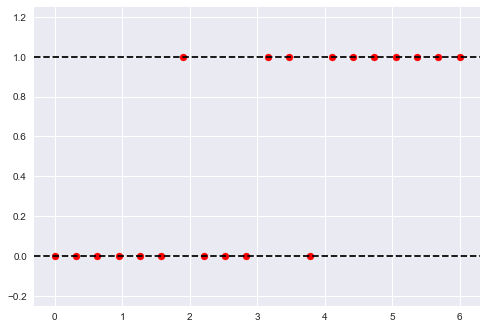

In [5]:
#generate 20 independent variable values between 0 and 6
xs = np.linspace(0, 6, 20)
#20 dependent binary variable values
ys = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]

#plot the data points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, color='red')
ax.axhline(y=1, c='black', linestyle='--')
ax.axhline(y=0, c='black', linestyle='--')
ax.set_ylim(-0.25, 1.25)
plt.show()

#### Naively, we could try to model the data with a simple linear regression:

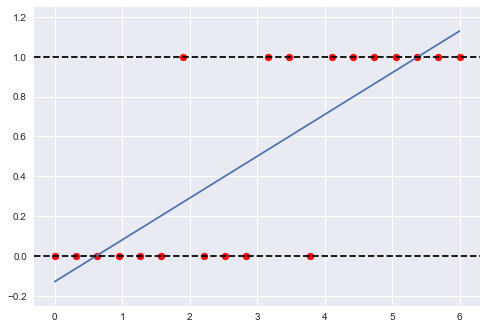

In [7]:
#fit the data to a linear regression model
lr = LinearRegression()
lr.fit(xs.reshape(-1,1), ys)
#equation of the regression line
regression_line = (lr.coef_ * xs) + lr.intercept_

#plot regression line and data points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, c='red')
ax.plot(xs, regression_line)
ax.axhline(y=1, c='black', linestyle='--')
ax.axhline(y=0, c='black', linestyle='--')
ax.set_ylim(-0.25, 1.25)
plt.show()

This is not a great fit. It is clear that most values on the regression line are not near 0 or 1. Also, the regression line contains values that fall outside of the range of 0-1.

To remedy this problem, we use a sigmoid function to transform the values obtained from the linear regression. A sigmoid function is one with the form: $$\sigma (t)={\frac {1}{1+e^{-t}}}$$
This function will always output a value between 0 and 1, which conveniently allows us to think of the function as a probability distribution describing whether the input value will be a success (1) or failure (0).
The probability is given by substituting the formula of the regression line for t:
$$F(x)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x)}}}$$


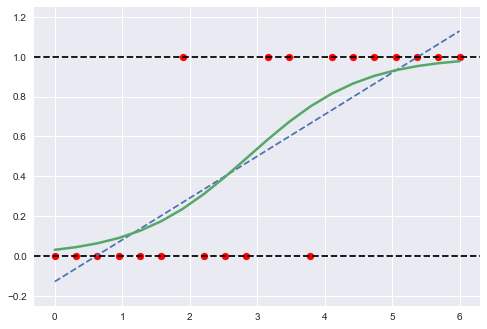

In [12]:
#create and train a logistic regression model
log_r = LogisticRegression(C=9)
log_r.fit(xs.reshape(-1,1), ys)
#plot logistic regression probabilities in green, linear regression in blue
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, c='red')
ax.plot(xs, regression_line, linestyle='--')
ax.plot(xs, log_r.predict_proba(xs.reshape(-1,1))[:,1], linewidth=2.5)
ax.axhline(y=1, c='black', linestyle='--')
ax.axhline(y=0, c='black', linestyle='--')
ax.set_ylim(-0.25, 1.25)
plt.show()

### Further Exploration
For a practical example, consider the <a href='https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)'>Breast Cancer Wisconsin dataset</a>. This dataset provides measurements taken from digitized images of breast mass along with a diagnosis of whether the mass was M - malignant or B - benign. The columns describe the mean, standard error, and largest of the following ten categories:
a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

In [20]:
#load the dataset
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#information about the daset
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [14]:
#select target (diagnosis) and features
columns = data.columns
target = data['diagnosis']
#drop target and unnecessary columns from features
features = data[columns.drop(['diagnosis', 'id', 'Unnamed: 32'])]
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
#encode the target column to 0 and 1 instead of B and M (respectively)
target = pd.concat([target, pd.get_dummies(target)], axis=1)
target = target['M']
target.head()

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [16]:
#split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [24]:
#scale the training and testing set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#train a logistic regression to the training set
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
predictions = log_classifier.predict(X_test)
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=uint8)

In [28]:
c_matrix = confusion_matrix(y_test, predictions)
pd.DataFrame(c_matrix)

,0,1
0,65,2
1,2,45
